In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [2]:
img = cv.imread('Lake.jpg')

In [3]:
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [4]:
print(rgb_img.shape)

(494, 480, 3)


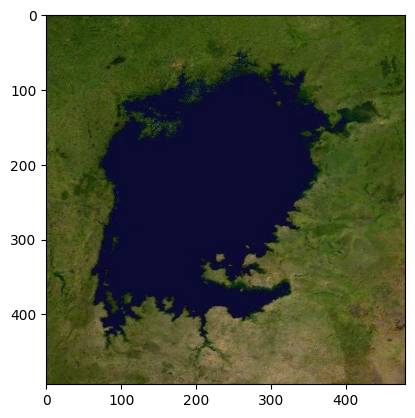

In [5]:
plt.imshow(rgb_img)

In [6]:
img = rgb_img.reshape(-1,3)

In [7]:
img.shape

(237120, 3)

In [8]:
model = KMeans(3, random_state=42)

In [9]:
model.fit(img)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [10]:
cent = model.cluster_centers_

In [11]:
cents = np.uint8(cent)
cents.shape

(3, 3)

In [12]:
output = model.predict(img)
print(output.shape)
print(img.shape)

(237120,)
(237120, 3)


In [13]:
segmented_data = cents[output.flatten()]

In [14]:
out_img = segmented_data.reshape(rgb_img.shape)

In [15]:
out_img.shape

(494, 480, 3)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(out_img)
plt.title('Roll: [5,9]')
plt.show()

In [17]:
color = []
for col in cents:
    r = col[0]/255
    g = col[1]/255
    b = col[2]/255
    color.append((r, g,b))


In [ ]:
lab, count = np.unique(output, return_counts= True)

def cal_per(count):
    sum = np.sum(count)
    per =[]
    for value in count:
        per.append(value*100/sum)
    return per


def plot_pie(count):
    y = cal_per(count.flatten())

    plt.figure(figsize=(8,6))
    plt.pie(y, colors=color,labels = np.trunc(y))
    plt.title('Roll: [5,9]')
    plt.show()

plot_pie(count)

In [19]:
def make_dataframe(count, cents):
    names = ['R', 'G', 'B', 'count']
    count = count.reshape(-1,1)


    # data = np.vstack((cents, count))

    df1 = pd.DataFrame(count)
    df2 = pd.DataFrame(cents)

    df = pd.concat([df2, df1], axis =1 )
    df.columns = names
    return df


df = make_dataframe(count, cents)
df

,R,G,B,count
0,64,79,22,111144
1,11,12,45,77288
2,107,103,56,48688


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

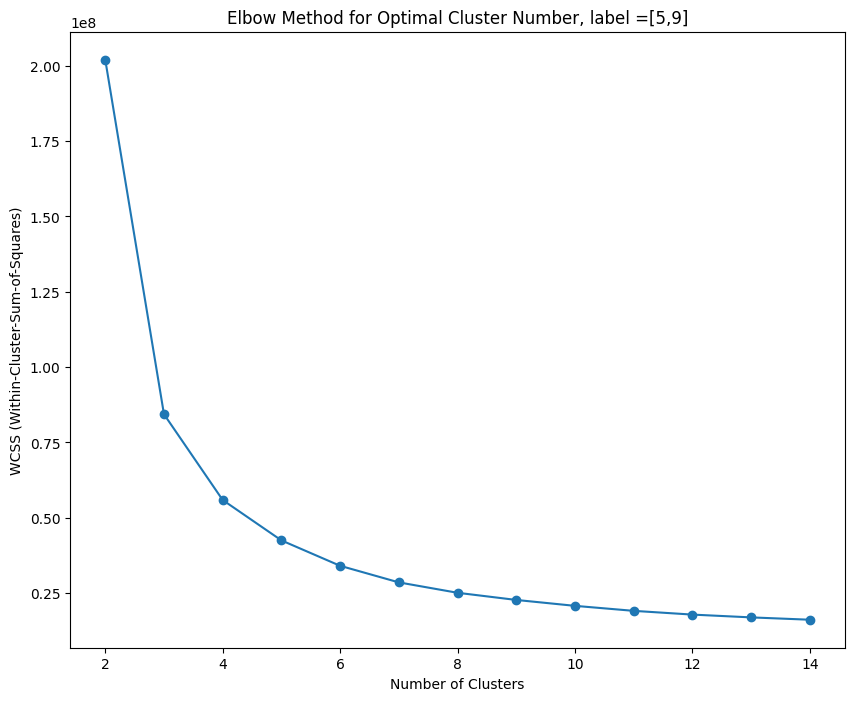

In [35]:
wcss_values = []
cluster_range = range(2,15)
# Calculate WCSS for different cluster numbers
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(img)
    wcss_values.append(kmeans.inertia_) # WCSS value for this number of clusters

    # Plot WCSS values against the number of clusters
plt.figure(figsize= (10,8))
plt.plot(cluster_range, wcss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.title('Elbow Method for Optimal Cluster Number, label =[5,9]')
plt.show()

In [37]:
# k = 4, optimal value
#Repeating

model = KMeans(4, random_state=42)
model.fit(img)
cent = model.cluster_centers_
cents = np.uint8(cent)
cents.shape



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(4, 3)

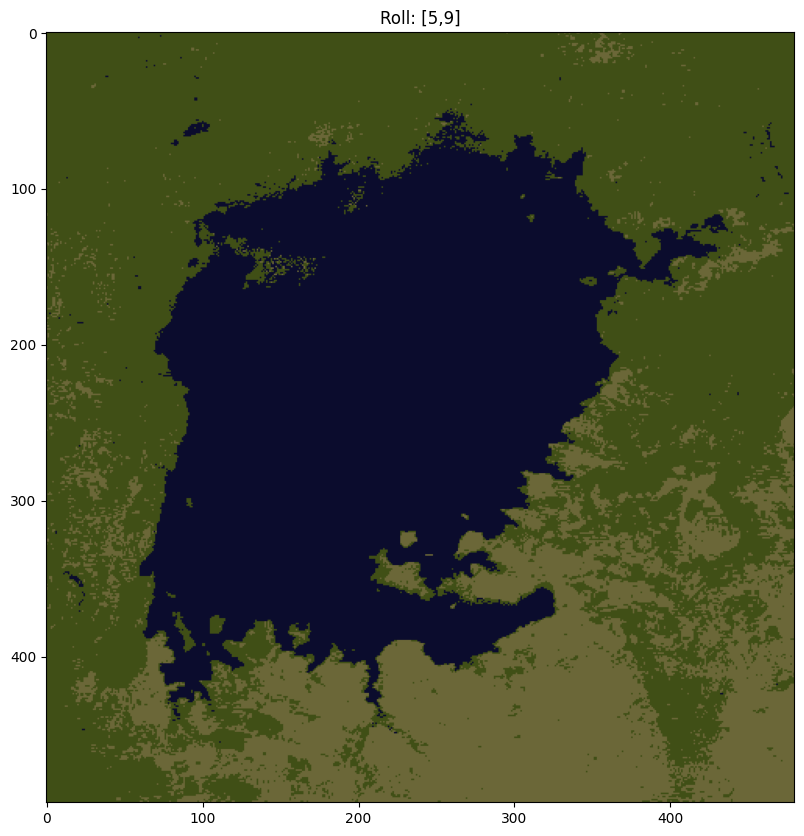

In [38]:
output = model.predict(img)
segmented_img = cents[output.flatten()]
seg_img = segmented_data.reshape(rgb_img.shape)
out_img = segmented_data.reshape(rgb_img.shape)

plt.figure(figsize=(10,10))
plt.imshow(out_img)
plt.title('Roll: [5,9]')
plt.show()

In [23]:
np.unique(output)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
color = []
for col in cents:
    r = col[0]/255
    g = col[1]/255
    b = col[2]/255
    color.append((r, g,b))


lab, count = np.unique(output, return_counts= True)
plt.title('Roll: [5,9]')
plot_pie(count)

In [25]:
def make_dataframe(count, cents):
    names = ['R', 'G', 'B', 'count']
    count = count.reshape(-1,1)


    # data = np.vstack((cents, count))

    df1 = pd.DataFrame(count)
    df2 = pd.DataFrame(cents)

    df = pd.concat([df2, df1], axis =1 )
    df.columns = names
    return df


df = make_dataframe(count, cents)
df

,R,G,B,count
0,81,90,35,62820
1,11,12,46,76088
2,117,109,65,28867
3,56,74,17,69345


In [26]:
out = model.fit_predict(img)
print(out.shape,img.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(237120,) (237120, 3)


# silhouette Analysis

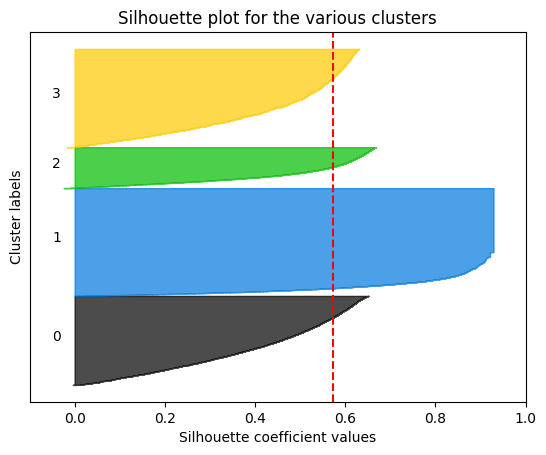

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Calculate silhouette scores and samples
silhouette_avg = silhouette_score(img, output)
sample_silhouette_values = silhouette_samples(img, out)


fig, ax = plt.subplots()
y_lower = 10

# Loop over each cluster
n_clusters = 4
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to the current cluster
    ith_cluster_silhouette_values = sample_silhouette_values[out == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Plot the silhouette plot for the current cluster
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plot with cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

# Set the plot properties
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_title("Silhouette plot for the various clusters")

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


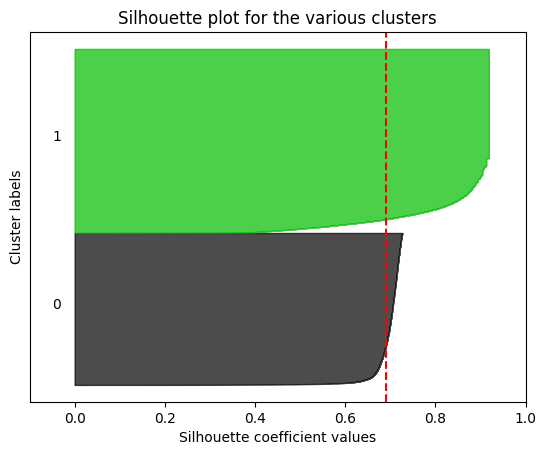

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


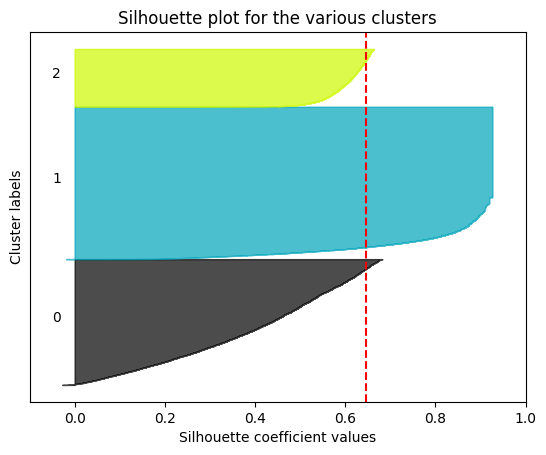

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


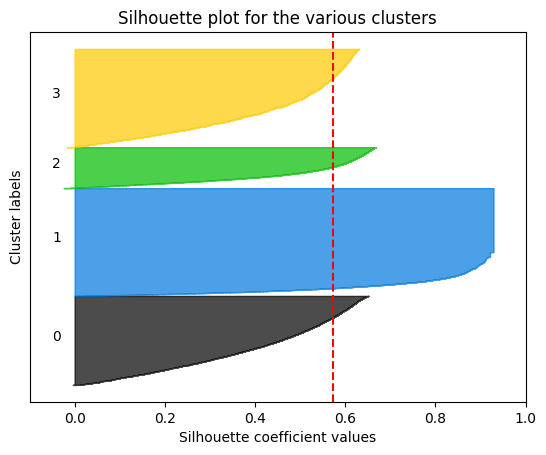

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


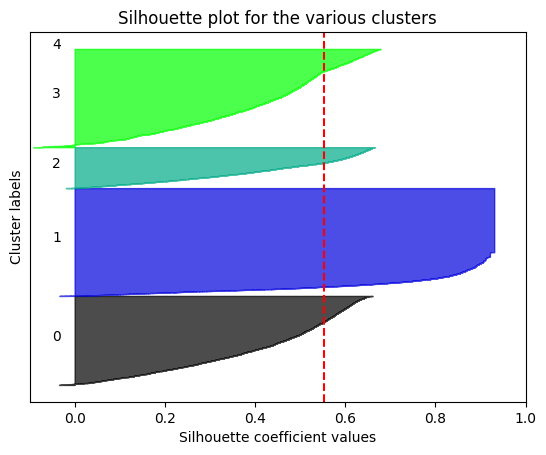

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


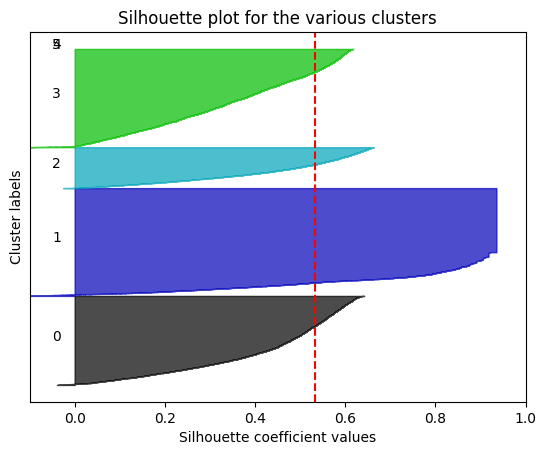

In [30]:
k_values = range(2,7)

for k in k_values:
  model = KMeans(k, random_state=42)
  output = model.fit_predict(img)
  n_clusters = k

  silhouette_avg = silhouette_score(img, output)
  sample_silhouette_values = silhouette_samples(img, output)


  fig, ax = plt.subplots()
  y_lower = 10

  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to the current cluster
      ith_cluster_silhouette_values = sample_silhouette_values[out == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      # Plot the silhouette plot for the current cluster
      color = cm.nipy_spectral(float(i) / n_clusters)
      ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plot with cluster numbers
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10

  # Set the plot properties
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax.set_yticks([])
  ax.set_xlim([-0.1, 1])
  ax.set_xlabel("Silhouette coefficient values")
  ax.set_ylabel("Cluster labels")
  ax.set_title("Silhouette plot for the various clusters")

  plt.show()

In [32]:
for k in k_values:
  print(k)

2
3
4
5
6


In [34]:
sample_silhouette_values.shape

(237120,)